In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Import from optimize_satellite.py
from body import create_sphere, verify_normals_outward
from drag import compute_aoa_and_area

Normal check: 160 outward, 0 inward
All normals point outward from the center.
Panel ID: 158
Panel 158 points: [-0.93969262  0.10569004 -0.32528049], [-1.00000000e+00  3.78436673e-17 -1.16470832e-16], [-0.93969262  0.27670011 -0.2010344 ]


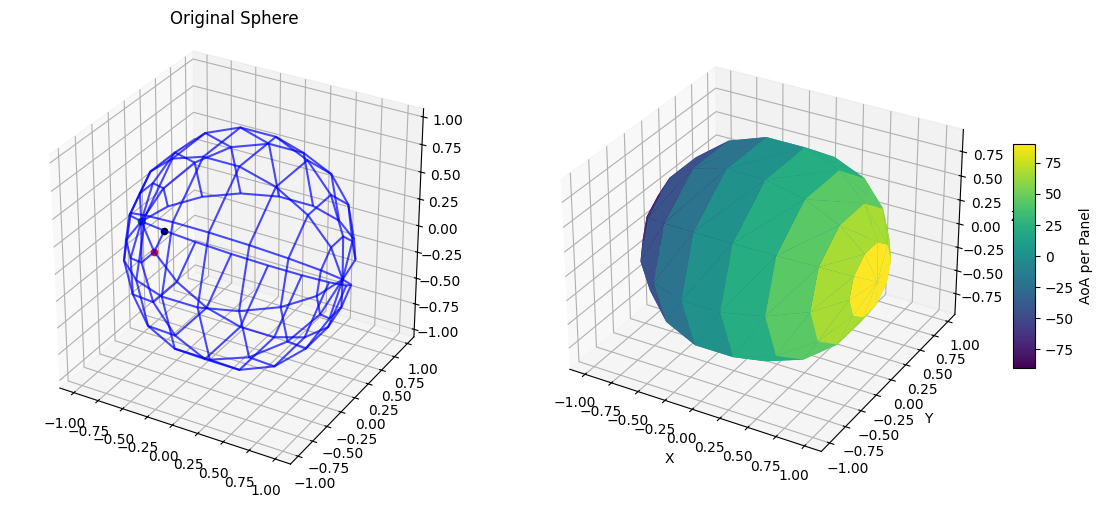

In [2]:
# Create a sphere mesh
n_phi, n_theta = 10, 10
radius = 1.0
center = (0.0, 0.0, 0.0)
mesh_vertices, panels = create_sphere(n_phi, n_theta, radius, center)

# Verify normals are outward
if verify_normals_outward(mesh_vertices, panels, center):
    print("All normals point outward from the center.")
else:
    print("Some normals point inward!")

# Plot comparison
fig = plt.figure(figsize=(12, 5))

# Original
ax1 = fig.add_subplot(121, projection="3d")
x_orig = mesh_vertices[:, 0].reshape(n_phi, n_theta)
y_orig = mesh_vertices[:, 1].reshape(n_phi, n_theta)
z_orig = mesh_vertices[:, 2].reshape(n_phi, n_theta)
ax1.plot_wireframe(x_orig, y_orig, z_orig, color="blue", alpha=0.7)
ax1.set_title("Original Sphere")
ax1.set_box_aspect([1, 1, 1])

# Plot panel in same subplot
id = len(panels) - 2
print(f"Panel ID: {id}")
panel = panels[id]
p1, p2, p3 = (
    mesh_vertices[panel[0]],
    mesh_vertices[panel[1]],
    mesh_vertices[panel[2]],
)
print(f"Panel {id} points: {p1}, {p2}, {p3}")
ax1.scatter(p1[0], p1[1], p1[2], color="red")
ax1.scatter(p2[0], p2[1], p2[2], color="green")
ax1.scatter(p3[0], p3[1], p3[2], color="black")

# Plot the angle of attack as a color
aoas, areas = compute_aoa_and_area(
    panels, mesh_vertices, incident_velocity=np.array([-1, 0, 0])
)

# Second subplot: Surface colored by aoas
ax2 = fig.add_subplot(122, projection="3d")

# Create triangles for 3D plotting
triangles = []
colors = []
for i, panel in enumerate(panels):
    # Get triangle vertices
    p1, p2, p3 = (
        mesh_vertices[panel[0]],
        mesh_vertices[panel[1]],
        mesh_vertices[panel[2]],
    )
    triangle = [p1, p2, p3]
    triangles.append(triangle)

    # Color based on aoas value
    aoa = aoas[i]
    # norme between 0 and 1 from -90 to 90 degrees
    aoa_normed = (aoa - np.min(aoas)) / (np.max(aoas) - np.min(aoas))

    color = plt.cm.viridis(aoa_normed)  # Use colormap to get color
    colors.append(color)

# Create 3D polygon collection
poly3d = Poly3DCollection(triangles, facecolors=colors, edgecolors="none")
ax2.add_collection3d(poly3d)

# Add colorbar for aoas values
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=-90, vmax=90))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax2, shrink=0.5, aspect=10)
cbar.set_label("AoA per Panel")

ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

plt.tight_layout()

plt.show()